## Isolation Forest Anomaly Detection

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Create two blobs (clusters)
X_clusters, _ = make_blobs(n_samples=200, centers=[(-2, 5), (2, 2)],
                           cluster_std=0.7, random_state=42)

# Create scattered outliers
X_outliers = np.random.uniform(low=-6, high=10, size=(50, 2))

# Combine both
df = np.vstack([X_clusters, X_outliers])
x=df
df=pd.DataFrame(df)
df.head()

,0,1
0,-1.018044,4.018704
1,-2.134653,5.211083
2,-0.974046,4.841957
3,2.225903,1.420938
4,-1.850134,4.127983


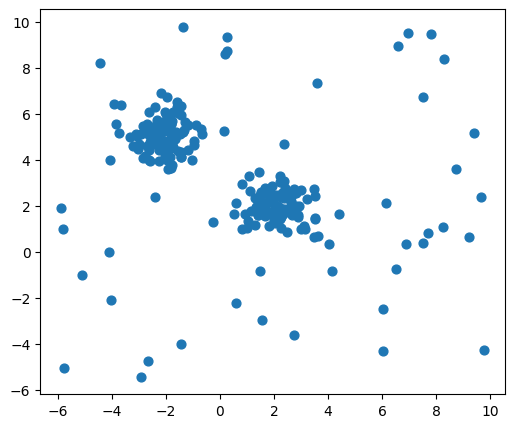

In [37]:
plt.figure(figsize=(6, 5))
plt.scatter(x[:, 0], x[:, 1], s=40)
plt.show()

In [38]:
from sklearn.ensemble import IsolationForest
clf=IsolationForest(contamination=0.2)
clf.fit(df)

IsolationForest(contamination=0.2)

In [39]:
pred=clf.predict(df)

In [40]:
pred

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

In [41]:
idx=np.where(pred<0)
idx


(array([ 38,  71, 136, 151, 200, 201, 202, 203, 204, 205, 206, 207, 208,
        209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,
        222, 223, 224, 225, 226, 227, 228, 230, 231, 232, 233, 235, 236,
        238, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249]),)

In [42]:
arr=df.values

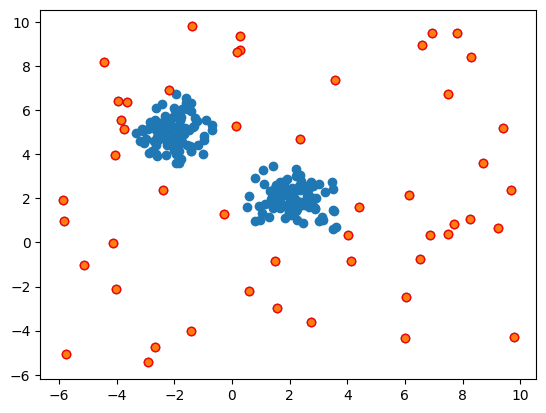

In [43]:
plt.scatter(df.iloc[:,0],df.iloc[:,1])
plt.scatter(arr[idx,0],arr[idx,1],edgecolors='red')